# Task 1: Exploratory Data Analysis (EDA) and Business Insights


In [3]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("C:/Users/murra/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/murra/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/murra/Downloads/Transactions.csv")


# Preview the datasets
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Basic Data Cleaning and Summary

In [4]:
# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Data types and basic statistics
print(customers.info())
print(products.describe())
print(transactions.describe())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   68

# Derive Insights

In [5]:

region_revenue = transactions.merge(customers, on="CustomerID").groupby("Region")["TotalValue"].sum()
print(region_revenue)


product_sales = transactions.merge(products, on="ProductID").groupby("Category")["Quantity"].sum()
print(product_sales)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Category
Books          681
Clothing       590
Electronics    627
Home Decor     639
Name: Quantity, dtype: int64


# Visualization

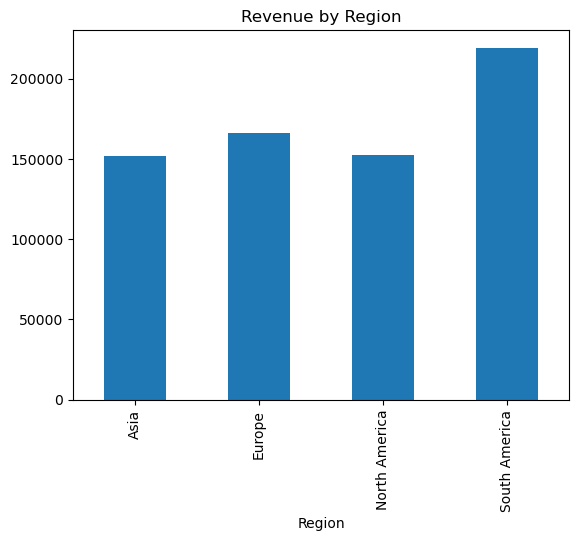

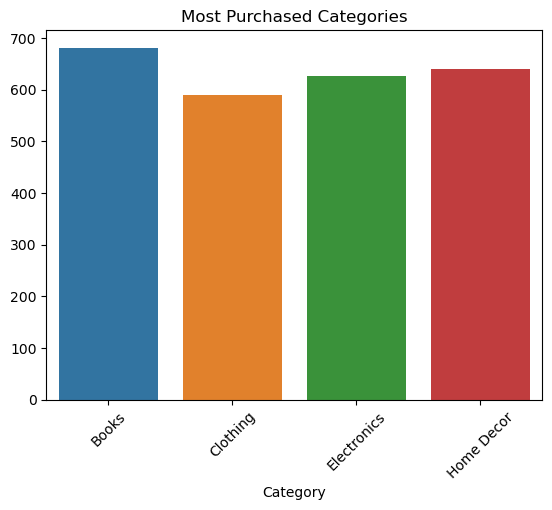

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


region_revenue.plot(kind='bar', title='Revenue by Region')
plt.show()

sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Most Purchased Categories")
plt.xticks(rotation=45)
plt.show()


# Task 2: Lookalike Model

# 1. Feature Engineering

In [7]:
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

# 2. Define Similarity Function

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Select relevant features
customer_features = data.groupby("CustomerID")[["TotalValue", "Quantity"]].sum()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

# Calculate similarity
similarity_matrix = cosine_similarity(scaled_features)
print(similarity_matrix)


[[ 1.          0.80759386  0.0024998  ...  0.96902986  0.89659207
  -0.89647264]
 [ 0.80759386  1.          0.59175604 ...  0.92821483  0.98525255
  -0.98529864]
 [ 0.0024998   0.59175604  1.         ...  0.24936518  0.4450973
  -0.44533872]
 ...
 [ 0.96902986  0.92821483  0.24936518 ...  1.          0.97818527
  -0.97812923]
 [ 0.89659207  0.98525255  0.4450973  ...  0.97818527  1.
  -0.99999996]
 [-0.89647264 -0.98529864 -0.44533872 ... -0.97812923 -0.99999996
   1.        ]]


# 3. Get Recommendations

In [10]:
import numpy as np

# Get top 3 similar customers
recommendations = {}
for idx, row in enumerate(similarity_matrix):
    similar_customers = np.argsort(-row)[1:4]  # Exclude self (highest similarity)
    recommendations[customer_features.index[idx]] = [
        (customer_features.index[i], row[i]) for i in similar_customers
    ]

# Save recommendations to CSV
recommendation_df = pd.DataFrame({
    "CustomerID": recommendations.keys(),
    "Lookalikes": [v for v in recommendations.values()]
})
recommendation_df.to_csv("FirstName_LastName_Lookalike.csv", index=False)


# Task 3: Customer Segmentation (Clustering)

# 1. Prepare Data for Clustering

In [11]:
clustering_data = data.groupby("CustomerID")[["TotalValue", "Quantity"]].sum()


# 2.Apply clustering algorithm

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Evaluate with Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_data, clusters)
print("Davies-Bouldin Index:", db_index)

# Add cluster labels to the dataset
clustering_data["Cluster"] = clusters


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.5666237267906667


# 3. Visualize Clusters

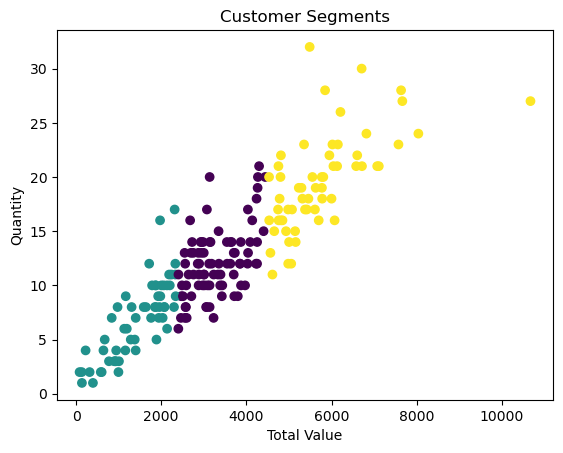

In [13]:
import matplotlib.pyplot as plt

# 2D Scatter Plot
plt.scatter(clustering_data["TotalValue"], clustering_data["Quantity"], c=clustering_data["Cluster"], cmap="viridis")
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.show()
